In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [18]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/v2_pendulum_inv_balance/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/v2_pendulum_inv_balance/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,ActionsAdvantageMean,ActionsClipFrac,ActionsEntropy,ActionsKL,ActionsReward,ActionsStopIter,ActionsVVals,AverageEpRet,Condition1,Condition2,...,LossGoalInverse,LossGoalsPi,LossGoalsV,Performance,StabilityActionError,StabilityGoalError,StabilityReward,StdEpRet,TotalEnvInteracts,Unit
0,-4.740433,NaN,0.931972,0.006109,0.597488,79.0,0.321081,-1088.12150,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.272048,NaN,NaN,-1088.12150,0.433636,0.287376,0.596844,254.371700,2400,0
1,-0.490281,NaN,0.920539,0.006129,0.608766,79.0,-4.752966,-1267.06700,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.259892,NaN,NaN,-1267.06700,0.381868,0.290964,0.608872,281.392940,4800,0
2,0.231932,NaN,0.894968,0.001169,0.604286,79.0,-6.090556,-1382.51060,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.253497,NaN,NaN,-1382.51060,0.483377,0.313314,0.604151,280.092530,7200,0
3,0.558748,NaN,0.889145,0.006361,0.640199,79.0,-5.158810,-1135.17960,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.251733,NaN,NaN,-1135.17960,0.459120,0.289505,0.640295,218.047710,9600,0
4,0.606550,NaN,0.912885,0.005315,0.631357,79.0,-5.188578,-1134.26440,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.250996,NaN,NaN,-1134.26440,0.272613,0.302533,0.631763,216.308840,12000,0
5,0.618815,NaN,0.916389,0.012487,0.631509,79.0,-5.448782,-1173.06460,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.249917,NaN,NaN,-1173.06460,0.270770,0.295840,0.631793,164.070270,14400,0
6,0.493770,NaN,0.941822,0.012922,0.625345,79.0,-5.925059,-1287.01150,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.249514,NaN,NaN,-1287.01150,0.327629,0.313203,0.625693,221.292250,16800,0
7,0.563946,NaN,0.924435,0.007954,0.627032,79.0,-5.687390,-1227.34220,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.249926,NaN,NaN,-1227.34220,0.265195,0.313978,0.627920,204.709170,19200,0
8,0.719186,NaN,0.897928,0.011814,0.634484,79.0,-6.671963,-1401.33790,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.249538,NaN,NaN,-1401.33790,0.324723,0.315358,0.635251,206.106300,21600,0
9,0.357605,NaN,0.896199,0.009458,0.627756,79.0,-6.233590,-1369.53480,bin-inv_balance_no_step-2400_pendulum-v0,bin-inv_balance_no_step-2400_pendulum-v0-10,...,0.248884,NaN,NaN,-1369.53480,0.199657,0.319505,0.628116,284.613900,24000,0


In [19]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves
0,bin-inv_balance_no_step-2400_pendulum-v0,2400,6
10,v2_pendulum-v0,2400,6


/Users/ppiech/openaigym/spinningup/spinup/utils/plot.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat(data, ignore_index=True)


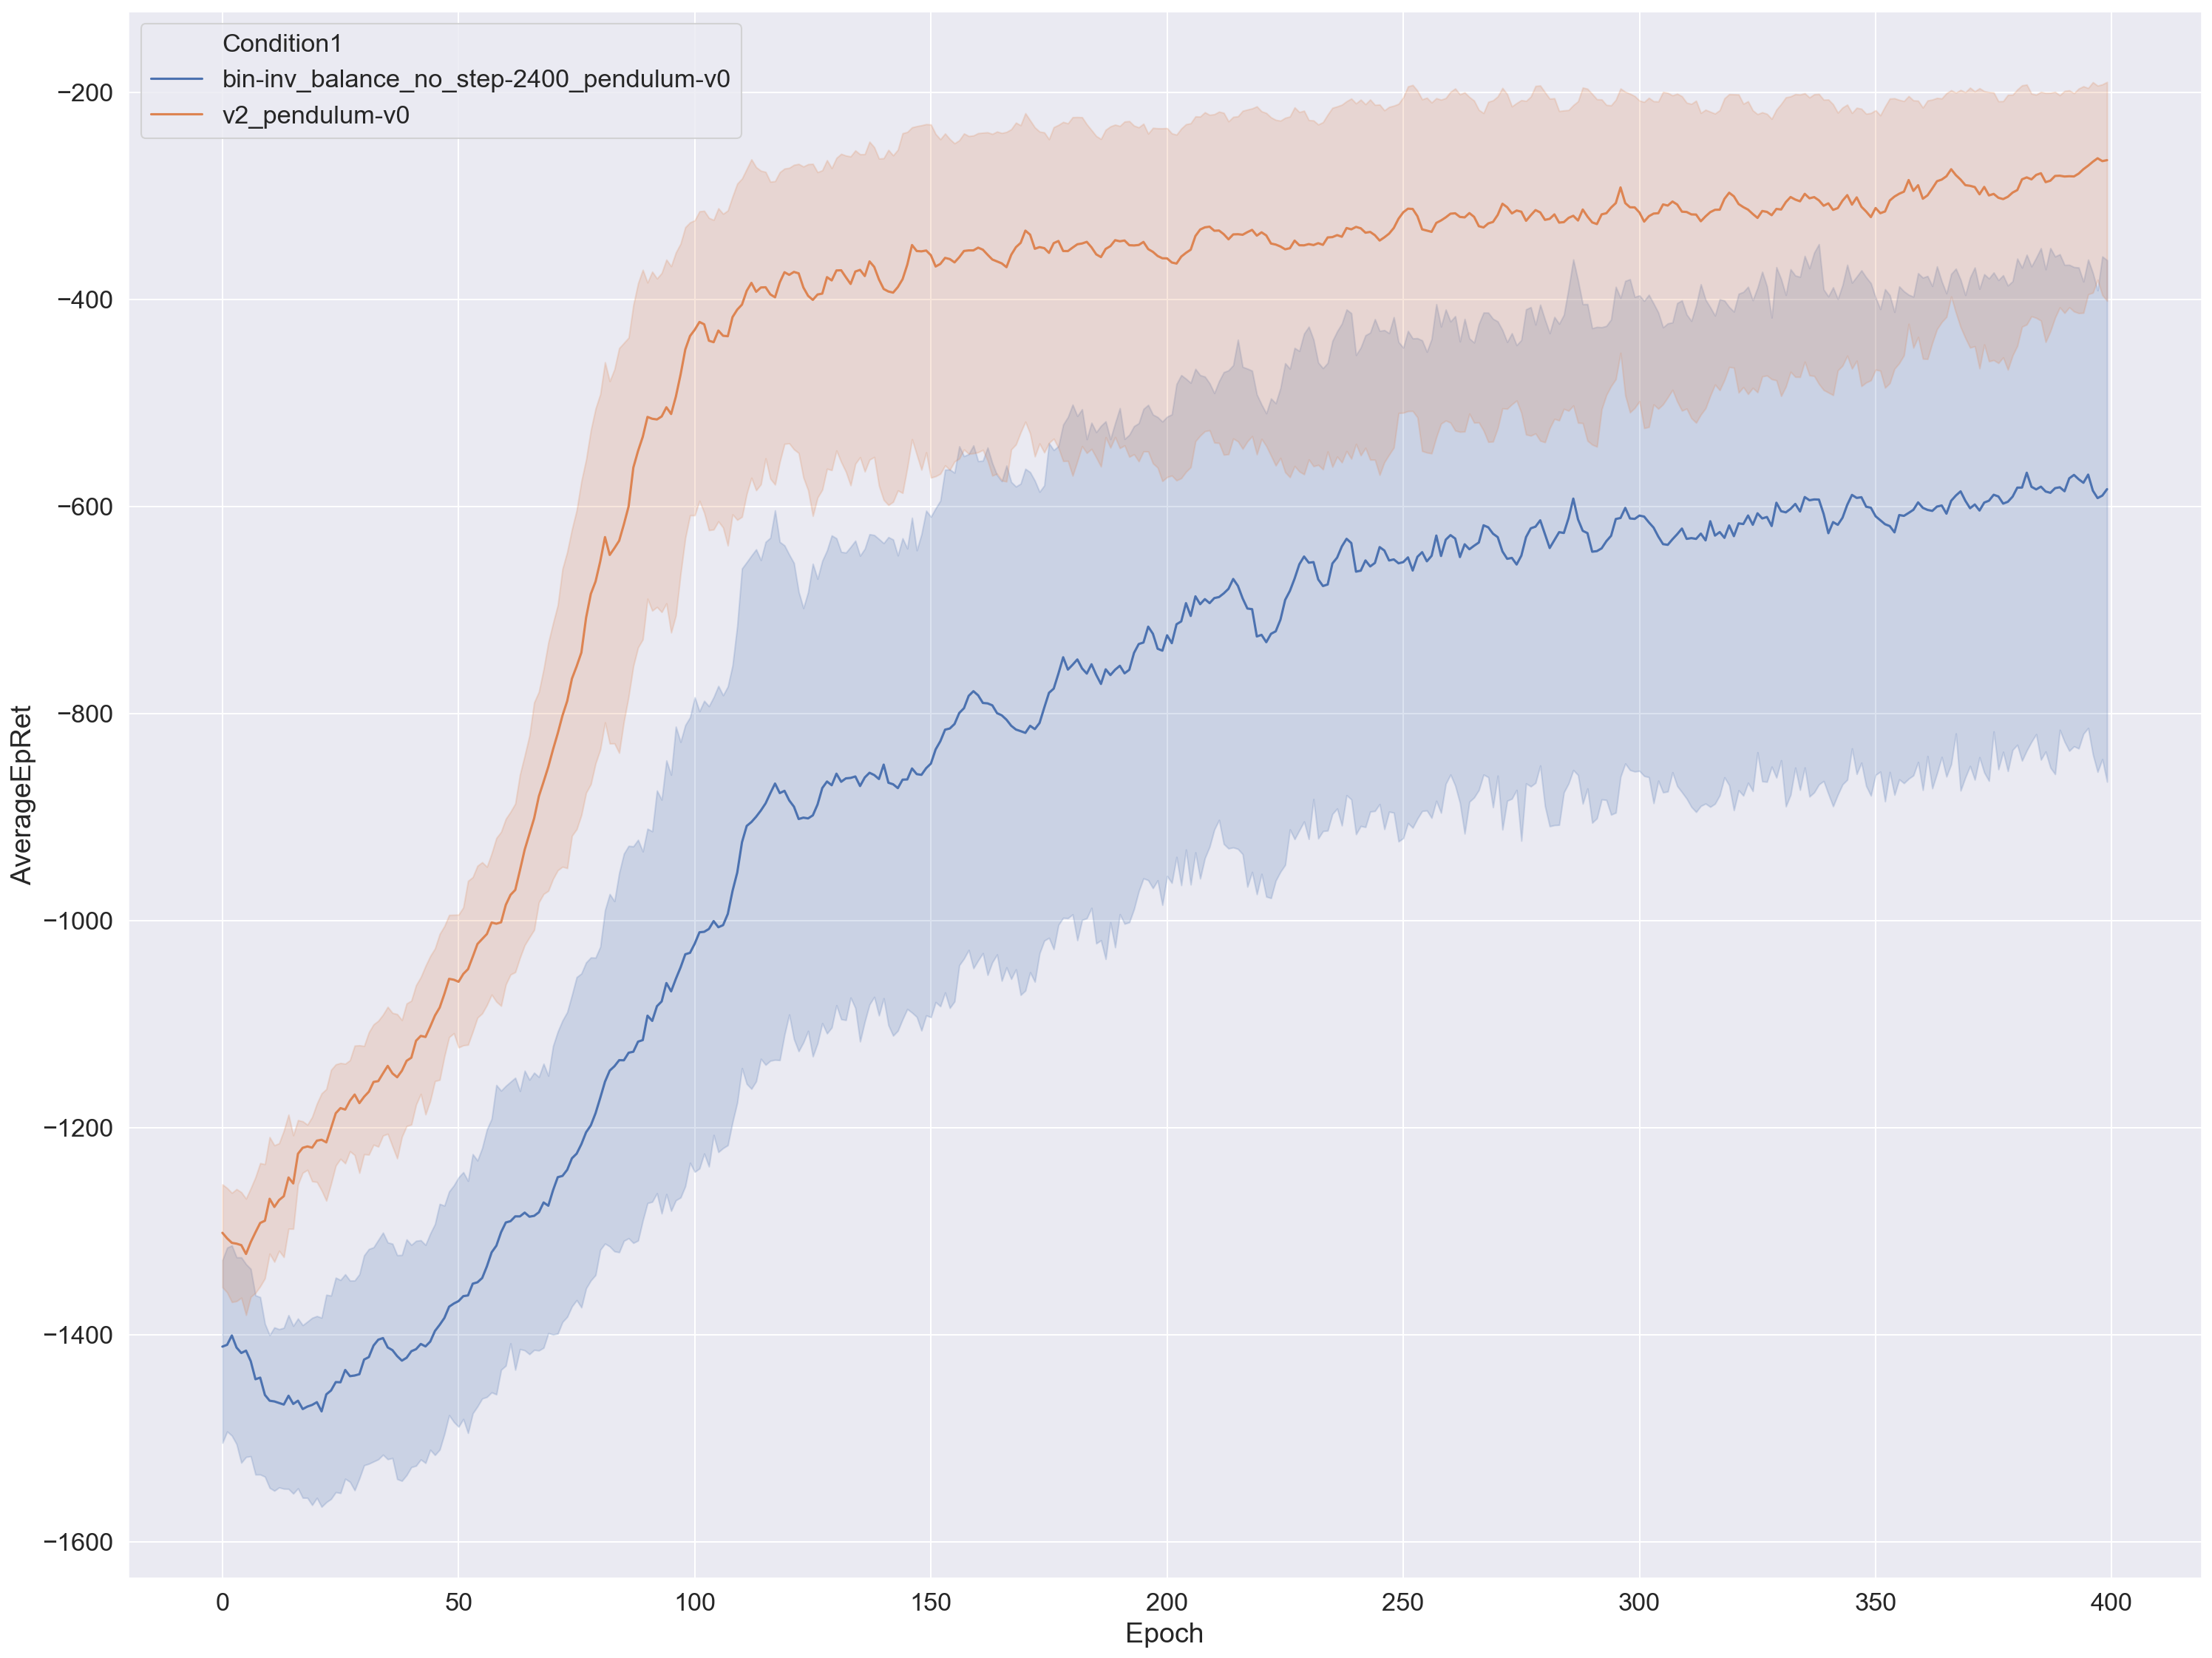

In [20]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5)
plt.show()

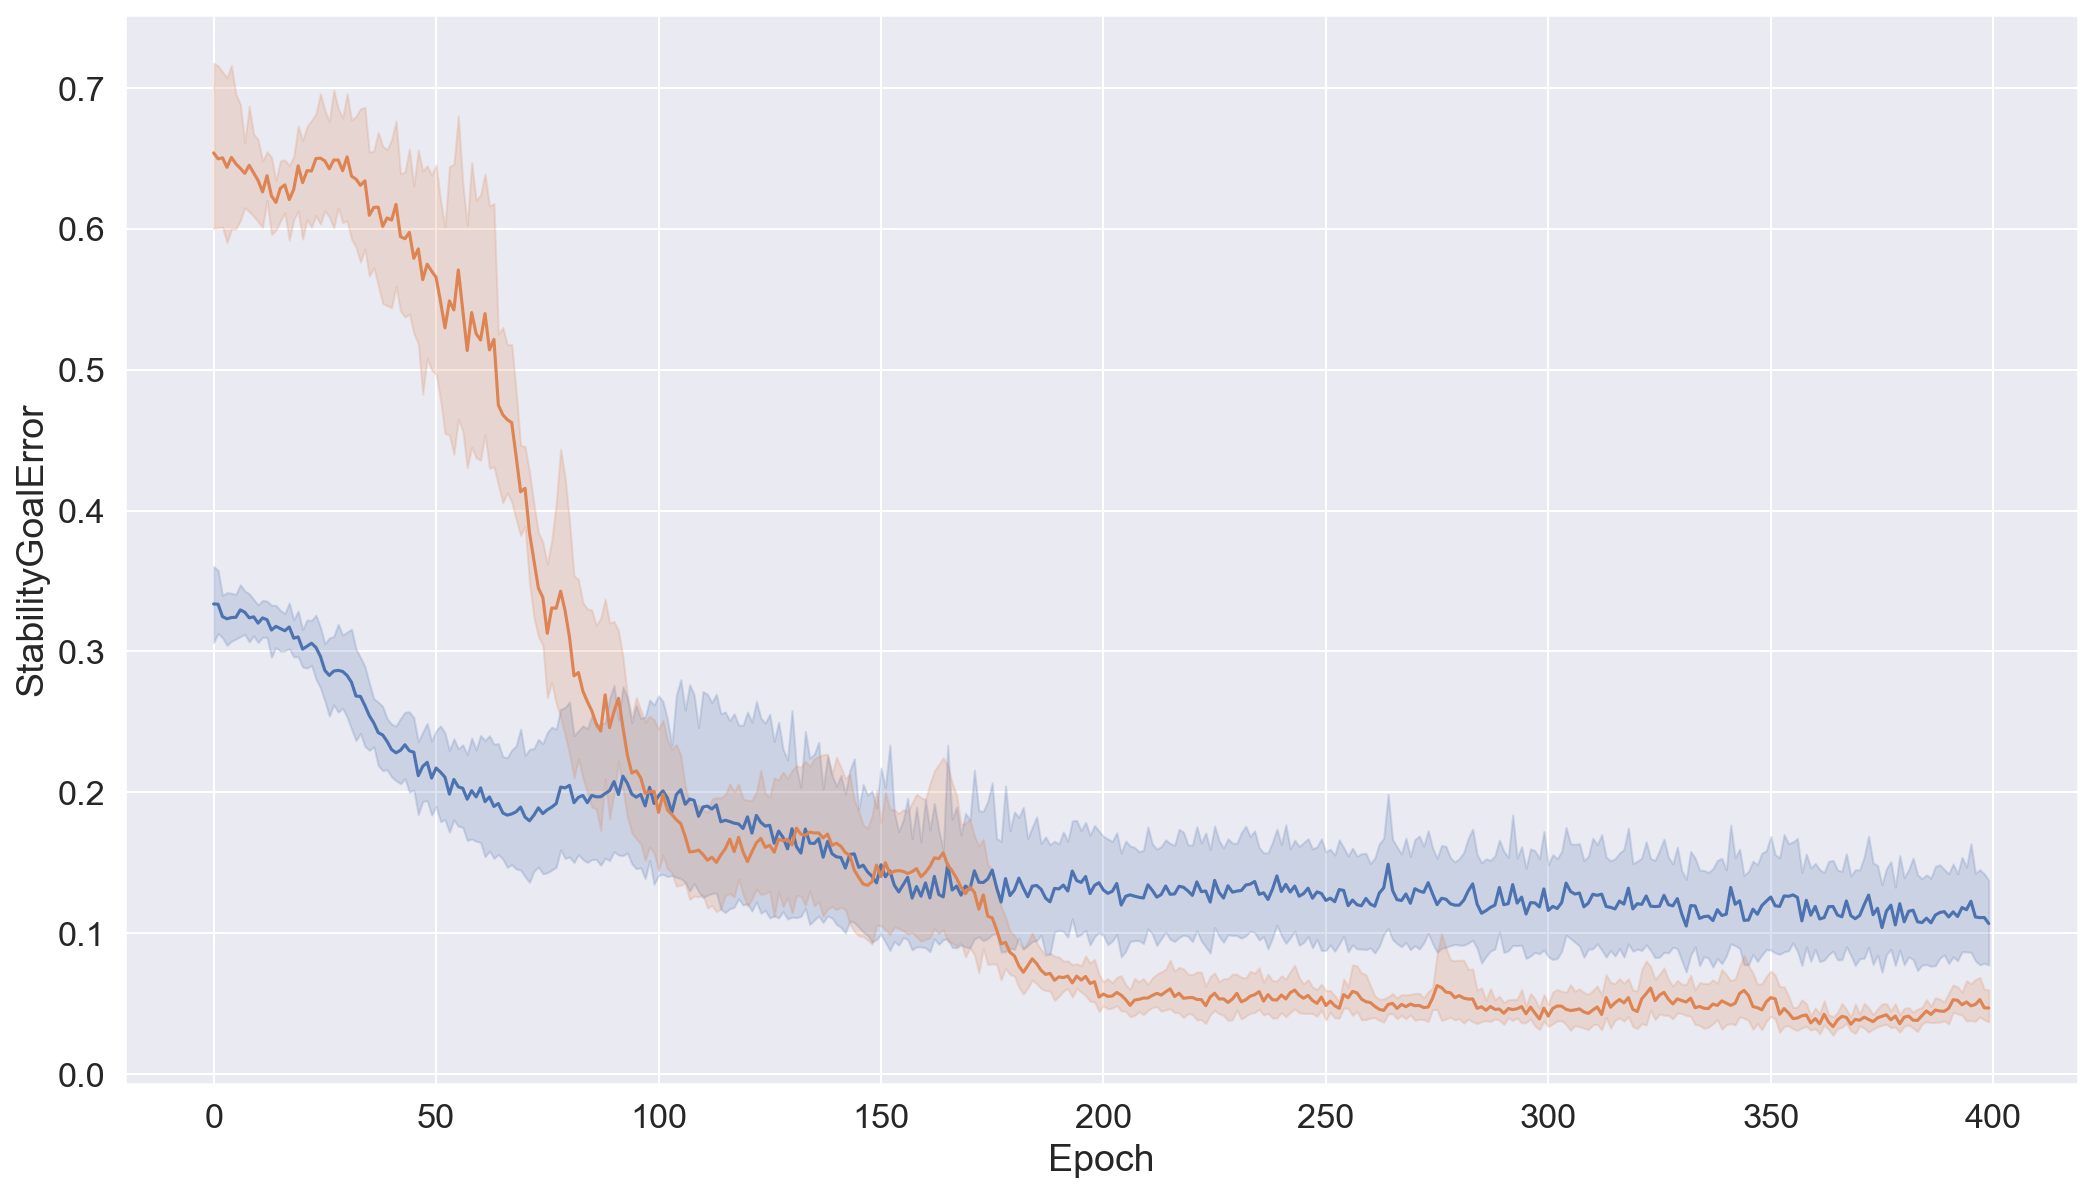

In [21]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

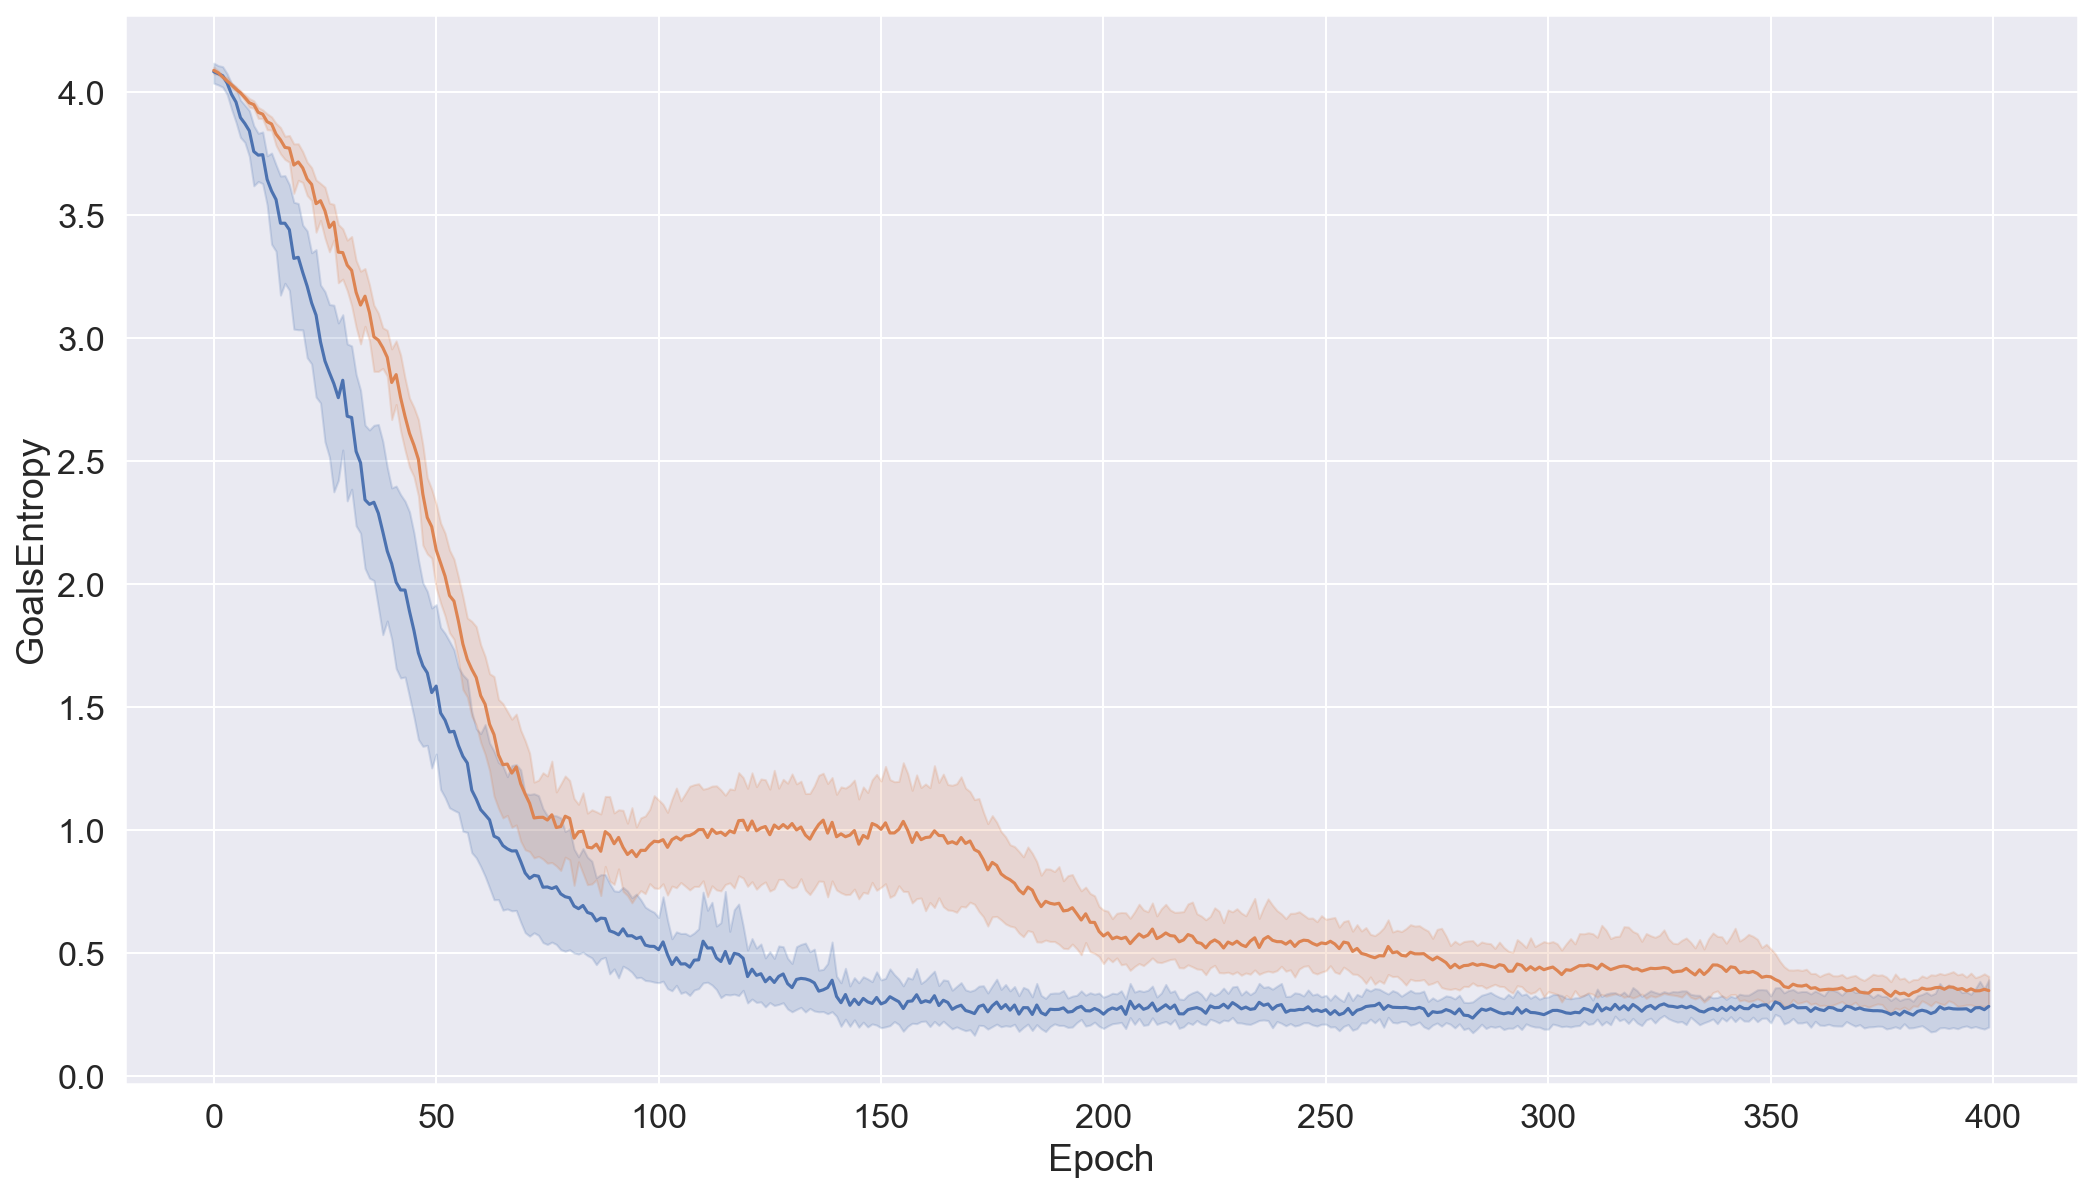

In [26]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

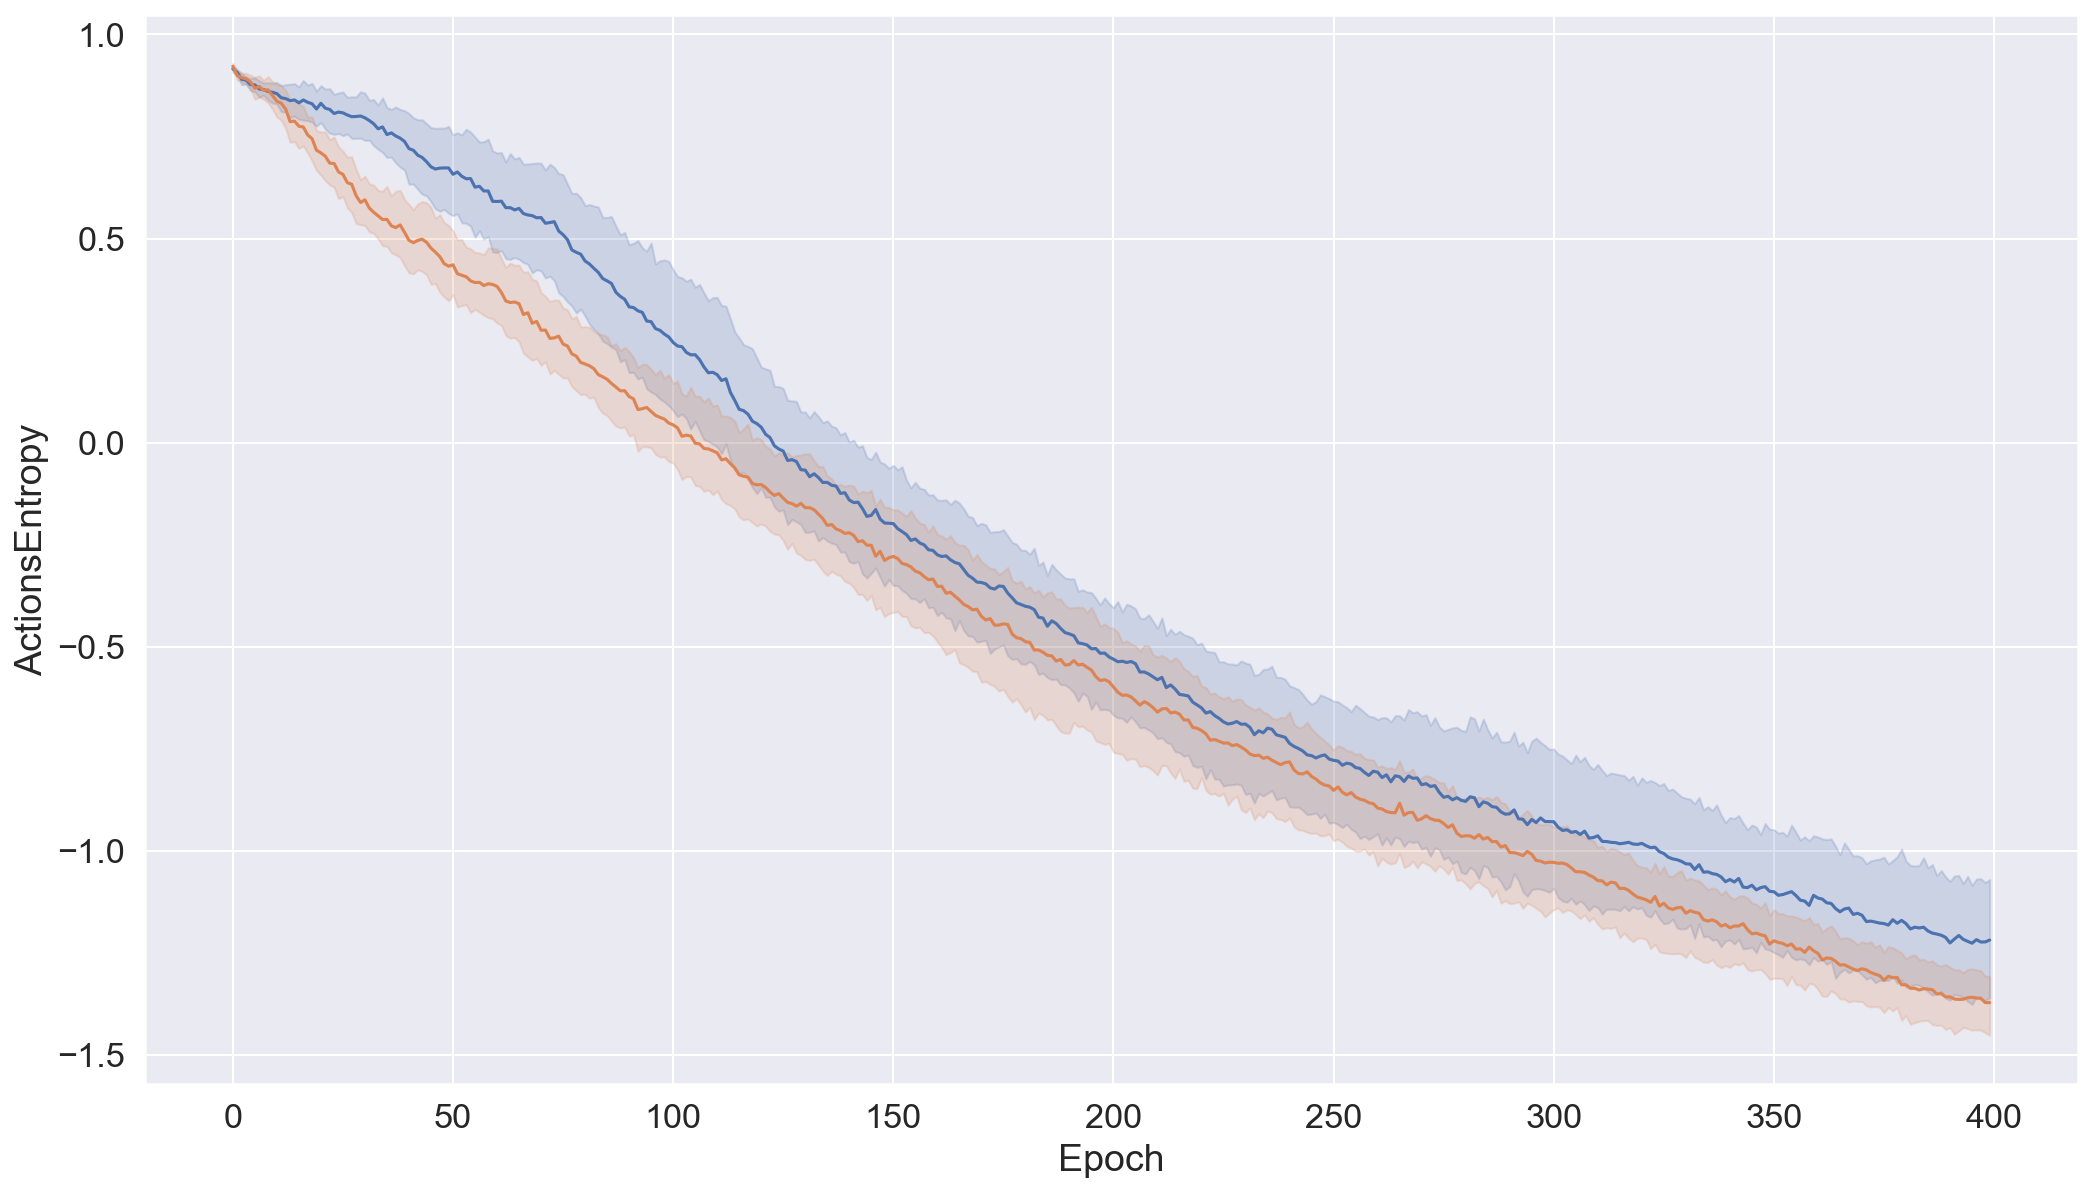

In [23]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

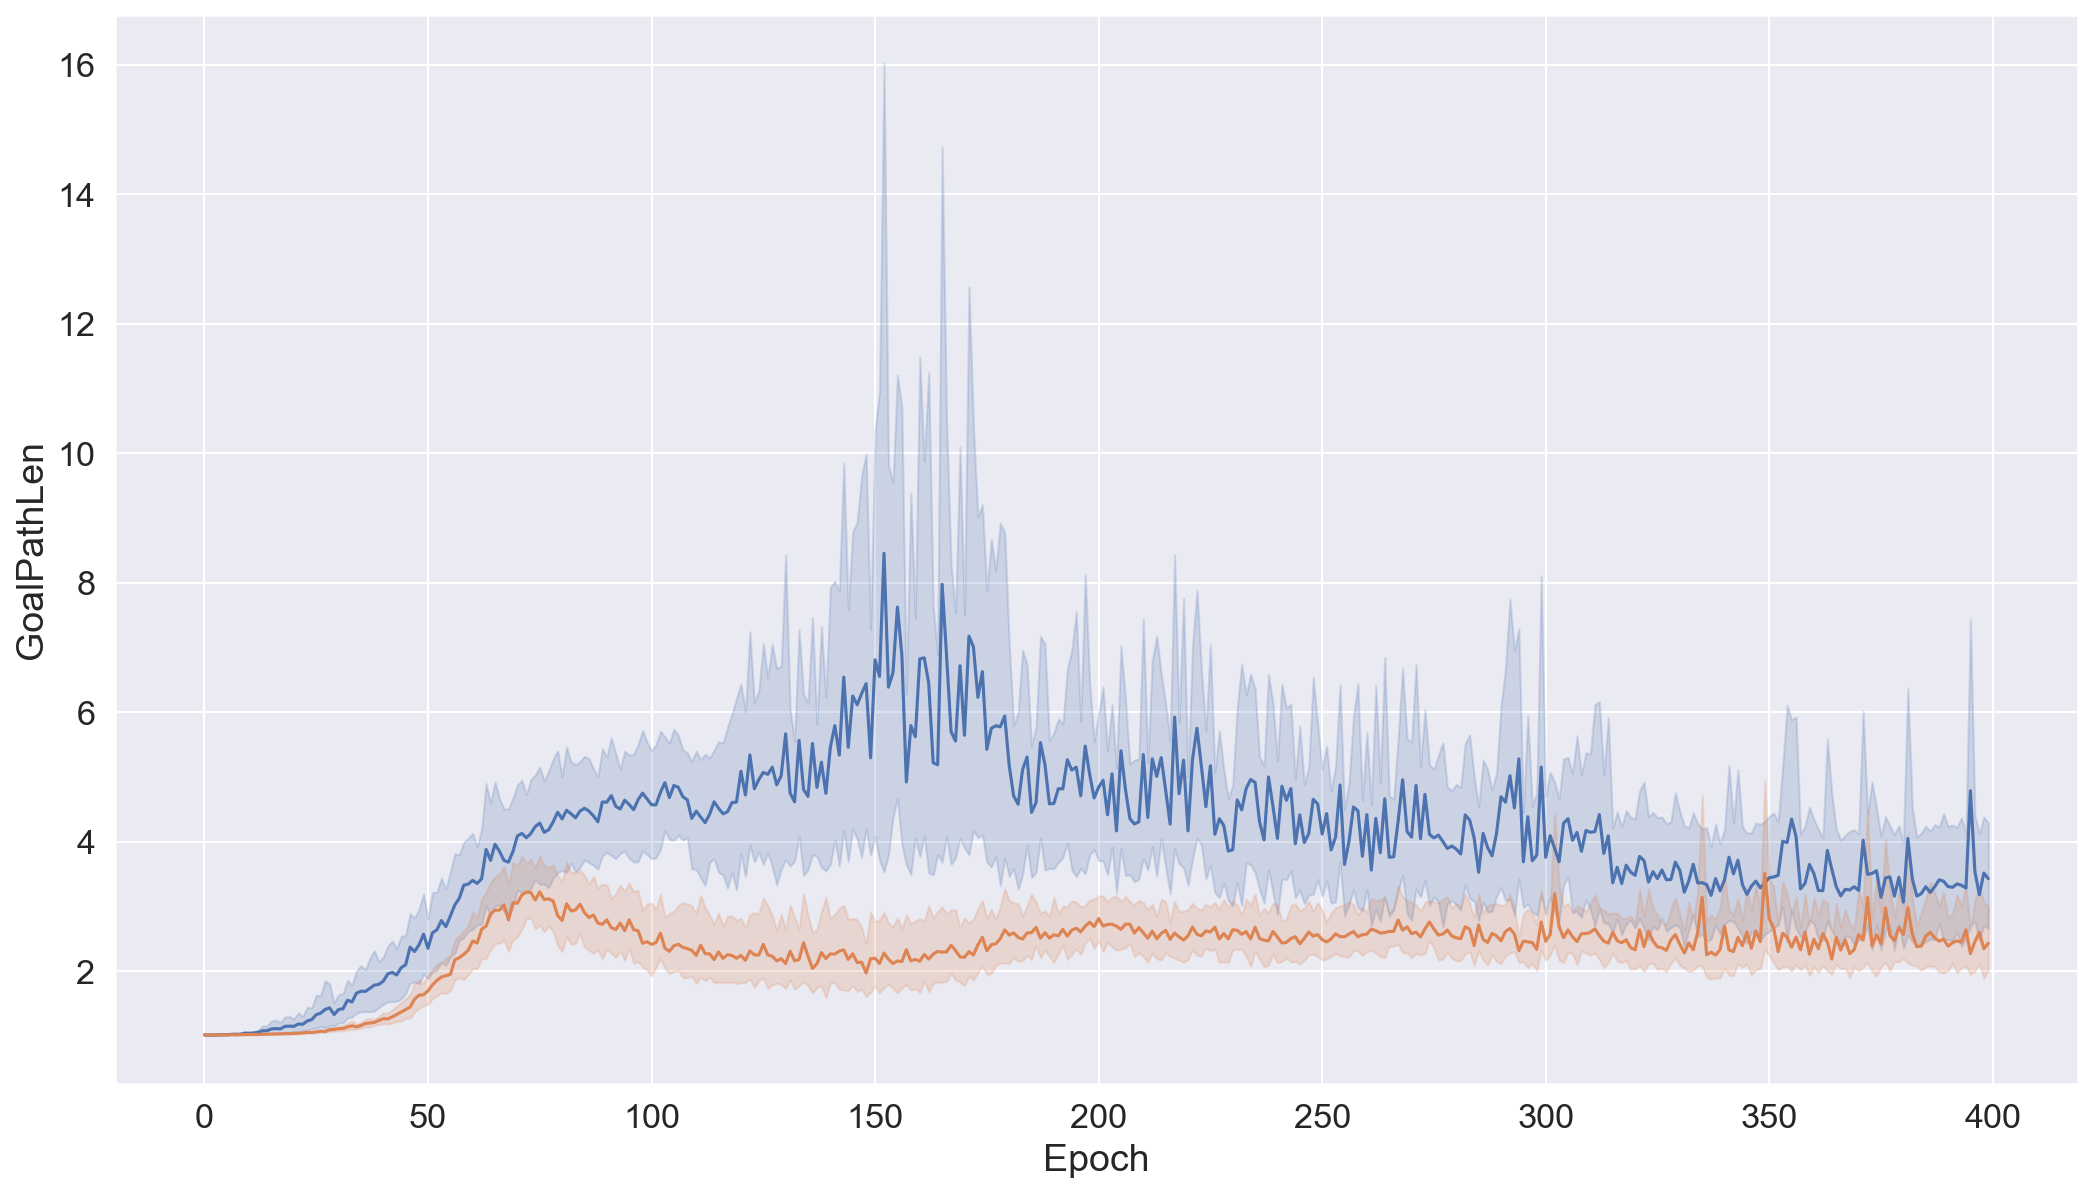

In [25]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()